Mục tiêu đồ án: Xây dựng mô hình dự báo thời gian trễ chuyến bay đến (Arrival Delay) cho các hãng hàng không / sân bay dự đoán thời gian trễ lúc hạ cánh.
Trong đồ án này, mô hình được xây dựng để dự đoán độ trễ khi hạ cánh tại thời điểm máy bay đã cất cánh.

1. Giới thiệu

Việc một chuyến bay bị chậm trễ thời gian hạ cánh là một trong những vấn đề nhức nhối, phiền phức và gây bất an cho các hãng hàng không, đặc biệt nhất là khách hàng. Việc dự đoán được thời gian trễ lúc hạ cánh sẽ giúp các hãng hàng không / sân bay dự đoán được thời điểm tiếp đất thích hợp, dự phòng rủi ro, đồng thời thông baó cho hành khách biết tình hình.

2. Tổng quan

Bài phân tích này sử dụng Bộ dữ liệu về Trễ và Hủy chuyến bay (2019–2023), được lấy từ Cục Thống kê Giao thông vận tải thuộc Bộ Giao thông vận tải Hoa Kỳ. Bộ dữ liệu cung cấp cái nhìn toàn diện về hoạt động bay nội địa trên khắp Hoa Kỳ, từ tháng 1 năm 2019 đến tháng 8 năm 2023. Nó chứa khoảng 3 triệu bản ghi và 32 thuộc tính, làm cho nó trở thành một nguồn tài nguyên mạnh mẽ cho việc phân tích dữ liệu, trực quan hóa và mô hình dự đoán.

Các tính năng chính của bộ dữ liệu bao gồm:

Chi tiết chuyến bay: Thông tin về ngày và giờ bay, hãng hàng không, số hiệu chuyến bay, sân bay xuất phát và điểm đến.

Trạng thái hoạt động: Các chỉ số cho biết chuyến bay đã hoàn thành, bị trì hoãn, bị hủy hoặc bị chuyển hướng.

Số liệu về sự chậm trễ: Tổng thời gian chậm trễ tính bằng phút, cũng như phân tích theo các nguyên nhân cụ thể như sự cố của hãng vận chuyển, thời tiết, sự chậm trễ của Hệ thống Không phận Quốc gia (NAS), an ninh và máy bay đến muộn.

Lý do hủy chuyến: Các lý do theo danh mục cho việc hủy chuyến bay.

Khoảng thời gian: Giá trị thời gian địa phương cho các sự kiện đã lên lịch và thực tế (khởi hành và đến).

Bộ dữ liệu được biên soạn bằng cách tổng hợp các báo cáo hàng tháng từ Bộ Giao thông vận tải (DOT) và đã trải qua quá trình làm sạch và chuyển đổi rộng rãi để tạo điều kiện thuận lợi cho việc phân tích có cấu trúc. Nó rất phù hợp cho việc phân tích dữ liệu thăm dò, xác định xu hướng và phát triển các mô hình học máy nhằm dự đoán sự chậm trễ và hủy chuyến.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
os.chdir(r"C:\Users\USER\PyCharmMiscProject\IE313.Q12")

In [4]:
df = pd.read_csv(r"dataset/flights_sample_3m.csv")
df

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2999995,2022-11-13,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1522,JAX,"Jacksonville, FL",CLT,"Charlotte, NC",...,0.0,85.0,71.0,55.0,328.0,NaN,NaN,NaN,NaN,NaN
2999996,2022-11-02,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1535,ORD,"Chicago, IL",AUS,"Austin, TX",...,0.0,176.0,145.0,130.0,977.0,NaN,NaN,NaN,NaN,NaN
2999997,2022-09-11,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2745,HSV,"Huntsville, AL",ATL,"Atlanta, GA",...,0.0,55.0,50.0,28.0,151.0,0.0,36.0,0.0,0.0,0.0
2999998,2019-11-13,Republic Airline,Republic Airline: YX,YX,20452,6134,BOS,"Boston, MA",LGA,"New York, NY",...,0.0,88.0,77.0,50.0,184.0,NaN,NaN,NaN,NaN,NaN


In [5]:
print("Có tổng cộng "+ str(df.shape[0]) +" dòng và "+ str(df.shape[1]) +" cột từ bộ dữ liệu.")

Có tổng cộng 3000000 dòng và 32 cột từ bộ dữ liệu.


Định nghĩa các cột trong bộ dữ liệu

FL_DATE: Ngày diễn ra chuyến bay.

AIRLINE: Tên hãng hàng không.

AIRLINE_DOT: Mã định danh hãng hàng không theo Bộ Giao thông Hoa Kỳ (DOT).

AIRLINE_CODE: Mã viết tắt của hãng hàng không.

DOT_CODE: Mã định danh DOT.

FL_NUMBER: Số hiệu chuyến bay.

ORIGIN: Mã sân bay khởi hành.

ORIGIN_CITY: Thành phố của sân bay khởi hành.

DEST: Mã sân bay đến.

DEST_CITY: Thành phố của sân bay đến.

CRS_DEP_TIME: Giờ khởi hành theo lịch trình dự kiến.

DEP_TIME: Giờ khởi hành thực tế.

DEP_DELAY: Thời gian trễ khi khởi hành (phút).

TAXI_OUT: Thời gian lăn bánh trước khi cất cánh (phút).

WHEELS_OFF: Thời điểm bánh máy bay rời khỏi mặt đất.

WHEELS_ON: Thời điểm bánh máy bay chạm đất khi hạ cánh.

TAXI_IN: Thời gian lăn bánh sau khi hạ cánh (phút).

CRS_ARR_TIME: Giờ đến theo lịch trình dự kiến.

ARR_TIME: Giờ đến thực tế.

ARR_DELAY: Thời gian trễ (hoặc sớm nếu âm) khi đến nơi, tính bằng phút.

CANCELLED: Trạng thái hủy chuyến bay (1 = bị hủy, 0 = không bị hủy).

CANCELLATION_CODE: Lý do hủy chuyến bay (nếu có).

DIVERTED: Trạng thái chuyến bay bị chuyển hướng (1 = có, 0 = không).

CRS_ELAPSED_TIME: Tổng thời gian bay dự kiến theo lịch (phút).

ELAPSED_TIME: Tổng thời gian bay thực tế (phút).

AIR_TIME: Thời gian máy bay bay trên không (phút).

DISTANCE: Khoảng cách bay giữa hai sân bay (dặm).

DELAY_DUE_CARRIER: Thời gian trễ do hãng hàng không gây ra.

DELAY_DUE_WEATHER: Thời gian trễ do thời tiết.

DELAY_DUE_NAS: Thời gian trễ do hệ thống không lưu quốc gia (NAS).

DELAY_DUE_SECURITY: Thời gian trễ do an ninh.

DELAY_DUE_LATE_AIRCRAFT: Thời gian trễ do máy bay đến muộn từ chuyến trước.

In [6]:
df.isna().sum().sort_values(ascending=False)

CANCELLATION_CODE          2920860
DELAY_DUE_LATE_AIRCRAFT    2466137
DELAY_DUE_CARRIER          2466137
DELAY_DUE_SECURITY         2466137
DELAY_DUE_NAS              2466137
DELAY_DUE_WEATHER          2466137
ARR_DELAY                    86198
ELAPSED_TIME                 86198
AIR_TIME                     86198
WHEELS_ON                    79944
TAXI_IN                      79944
ARR_TIME                     79942
WHEELS_OFF                   78806
TAXI_OUT                     78806
DEP_DELAY                    77644
DEP_TIME                     77615
CRS_ELAPSED_TIME                14
DEST_CITY                        0
CRS_DEP_TIME                     0
DEST                             0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
AIRLINE                          0
AIRLINE_DOT                      0
FL_DATE                          0
AIRLINE_CODE                     0
DIVERTED            

**Nhận xét về giá trị thiếu:**

- Các biến liên quan đến nguyên nhân trễ chuyến (`DELAY_DUE_*`) và `CANCELLATION_CODE` có số lượng giá trị thiếu rất lớn, do các biến này chỉ phát sinh khi chuyến bay bị huỷ hoặc bị trễ; các bản ghi còn lại được ghi nhận là thiếu.
- Biến mục tiêu `ARR_DELAY` và một số biến thời gian liên quan đến quá trình bay (`AIR_TIME`, `ELAPSED_TIME`, `DEP_DELAY`, …) có số lượng missing tương đối nhỏ so với tổng số quan sát.
- Trong phạm vi bài toán dự báo độ trễ khi đến, các bản ghi thiếu `ARR_DELAY` được loại bỏ, trong khi các biến `DELAY_DUE_*` và `CANCELLATION_CODE` không được sử dụng cho mô hình nhằm tránh mất mát dữ liệu quá lớn.


Tiến hành loại bỏ các dòng liên quan đến các chuyến bay bị hủy hoặc chuyển hướng

In [7]:
# Lọc: Chỉ giữ lại chuyến bay KHÔNG bị hủy và KHÔNG chuyển hướng
print(f"Kích thước DataFrame gốc: {len(df)}")
df = df[(df['CANCELLED'] == 0.0) & (df['DIVERTED'] == 0.0)].copy()
print("\n----------------- Sau khi Lọc dữ liệu ----------------------------------")
print(f"Kích thước DataFrame đã lọc: {len(df)}")

Kích thước DataFrame gốc: 3000000

----------------- Sau khi Lọc dữ liệu ----------------------------------
Kích thước DataFrame đã lọc: 2913804


Tiến hành loại bỏ các thuộc tính liên quan đến các chuyến bay bị hủy hoặc chuyển hướng

In [8]:
# Danh sách các cột cần loại bỏ
cols_to_drop_cancellation_divert = ['CANCELLED', 'CANCELLATION_CODE', 'DIVERTED']

# Loại bỏ các cột khỏi DataFrame df_clean
# errors='ignore' đảm bảo code vẫn chạy nếu một trong các cột (ví dụ: CANCELL_CODE) chưa tồn tại
# hoặc đã bị loại bỏ ở các bước trước đó.
df = df.drop(columns=cols_to_drop_cancellation_divert, errors='ignore')

print("Đã loại bỏ các cột CANCELLED, CANCELL_CODE và DIVERTED.")
print(f"Kích thước DataFrame mới: {df.shape}")

Đã loại bỏ các cột CANCELLED, CANCELL_CODE và DIVERTED.
Kích thước DataFrame mới: (2913804, 29)


In [9]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,ARR_DELAY,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,-14.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,-5.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,24.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,-1.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isna().sum().sort_values(ascending=False)

DELAY_DUE_CARRIER          2379941
DELAY_DUE_LATE_AIRCRAFT    2379941
DELAY_DUE_SECURITY         2379941
DELAY_DUE_NAS              2379941
DELAY_DUE_WEATHER          2379941
WHEELS_ON                        2
ARR_DELAY                        2
TAXI_IN                          2
ARR_TIME                         2
ELAPSED_TIME                     2
AIR_TIME                         2
AIRLINE                          0
FL_DATE                          0
DEP_DELAY                        0
DEP_TIME                         0
CRS_DEP_TIME                     0
DEST_CITY                        0
DEST                             0
ORIGIN_CITY                      0
ORIGIN                           0
FL_NUMBER                        0
DOT_CODE                         0
AIRLINE_CODE                     0
AIRLINE_DOT                      0
TAXI_OUT                         0
CRS_ELAPSED_TIME                 0
CRS_ARR_TIME                     0
WHEELS_OFF                       0
DISTANCE            

- Vì mục tiêu đồ án Dự đoán số phút trễ/sớm (ARR_DELAY) cho hành khách cân nhắc mua vé.
- Thời điểm dự đoán: trước khi chuyến bay diễn ra.
Ta sẽ tiến hành xóa các cột không liên quan dựa trên định nghĩa.

Xóa các cột gây LEAKAGE (chỉ có sau khi bay)

In [11]:
# Giữ lại DEP_DELAY để sử dụng làm feature
leakage_cols = [
    'DEP_TIME',
    # 'DEP_DELAY',  # Giữ lại để dùng làm feature dự đoán ARR_DELAY
    'TAXI_OUT',
    'WHEELS_OFF',
    'WHEELS_ON',
    'TAXI_IN',
    'ARR_TIME',
    'ELAPSED_TIME',
    'AIR_TIME'
]

df = df.drop(columns=leakage_cols, errors='ignore')

Xóa nguyên nhân gây trễ (LEAKAGE 100%)

In [12]:
delay_reason_cols = [
    'DELAY_DUE_CARRIER',
    'DELAY_DUE_WEATHER',
    'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY',
    'DELAY_DUE_LATE_AIRCRAFT'
]

df = df.drop(columns=delay_reason_cols, errors='ignore')

Xóa các cột định danh/ dư thừa thông tin

In [13]:
id_redundant_cols = [
    'AIRLINE_DOT',
    'AIRLINE_CODE',
    'DOT_CODE',
    'FL_NUMBER',
    'ORIGIN_CITY',
    'DEST_CITY'
]

df = df.drop(columns=id_redundant_cols, errors='ignore')

In [14]:
# Xóa các dòng thiếu ARR_DELAY và DEP_DELAY (các biến quan trọng)
df = df.dropna(subset=["ARR_DELAY", "DEP_DELAY"])

In [15]:
df.isna().sum().sort_values(ascending=False)

FL_DATE             0
AIRLINE             0
ORIGIN              0
DEST                0
CRS_DEP_TIME        0
DEP_DELAY           0
CRS_ARR_TIME        0
ARR_DELAY           0
CRS_ELAPSED_TIME    0
DISTANCE            0
dtype: int64

In [16]:
print(df.shape)
print(df.columns)
df.head()

(2913802, 10)
Index(['FL_DATE', 'AIRLINE', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_DELAY',
       'CRS_ARR_TIME', 'ARR_DELAY', 'CRS_ELAPSED_TIME', 'DISTANCE'],
      dtype='object')


,FL_DATE,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
0,2019-01-09,United Air Lines Inc.,FLL,EWR,1155,-4.0,1501,-14.0,186.0,1065.0
1,2022-11-19,Delta Air Lines Inc.,MSP,SEA,2120,-6.0,2315,-5.0,235.0,1399.0
2,2022-07-22,United Air Lines Inc.,DEN,MSP,954,6.0,1252,0.0,118.0,680.0
3,2023-03-06,Delta Air Lines Inc.,MSP,SFO,1609,-1.0,1829,24.0,260.0,1589.0
4,2020-02-23,Spirit Air Lines,MCO,DFW,1840,-2.0,2041,-1.0,181.0,985.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2913802 entries, 0 to 2999999
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   FL_DATE           object 
 1   AIRLINE           object 
 2   ORIGIN            object 
 3   DEST              object 
 4   CRS_DEP_TIME      int64  
 5   DEP_DELAY         float64
 6   CRS_ARR_TIME      int64  
 7   ARR_DELAY         float64
 8   CRS_ELAPSED_TIME  float64
 9   DISTANCE          float64
dtypes: float64(4), int64(2), object(4)
memory usage: 244.5+ MB


In [18]:
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])

In [19]:
df.describe()

,FL_DATE,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE
count,2913802,2.913802e+06,2.913802e+06,2.913802e+06,2.913802e+06,2.913802e+06,2.913802e+06
mean,2021-05-10 03:29:27.576795136,1.326079e+03,1.005009e+01,1.489821e+03,4.260858e+00,1.424097e+02,8.107197e+02
min,2019-01-01 00:00:00,1.000000e+00,-9.000000e+01,1.000000e+00,-9.600000e+01,1.800000e+01,2.900000e+01
25%,2019-12-25 00:00:00,9.150000e+02,-6.000000e+00,1.107000e+03,-1.600000e+01,9.000000e+01,3.780000e+02
50%,2021-07-02 00:00:00,1.317000e+03,-2.000000e+00,1.515000e+03,-7.000000e+00,1.250000e+02,6.530000e+02
75%,2022-08-04 00:00:00,1.730000e+03,6.000000e+00,1.918000e+03,7.000000e+00,1.730000e+02,1.047000e+03
max,2023-08-31 00:00:00,2.359000e+03,2.966000e+03,2.400000e+03,2.934000e+03,7.050000e+02,5.812000e+03
std,NaN,4.855753e+02,4.904988e+01,5.110368e+02,5.117482e+01,7.172213e+01,5.893703e+02


Nhận xét tổng quan các cột đều ổn. Tuy nhiên ARR_DELAY có outlier ( max = 2934 ~ 49 giờ ) trong khi mean có 4.26 phút. Có outliers


Thống kê mô tả ARR_DELAY

In [20]:
df['ARR_DELAY'].describe()

count    2.913802e+06
mean     4.260858e+00
std      5.117482e+01
min     -9.600000e+01
25%     -1.600000e+01
50%     -7.000000e+00
75%      7.000000e+00
max      2.934000e+03
Name: ARR_DELAY, dtype: float64

Biểu đồ phân phối

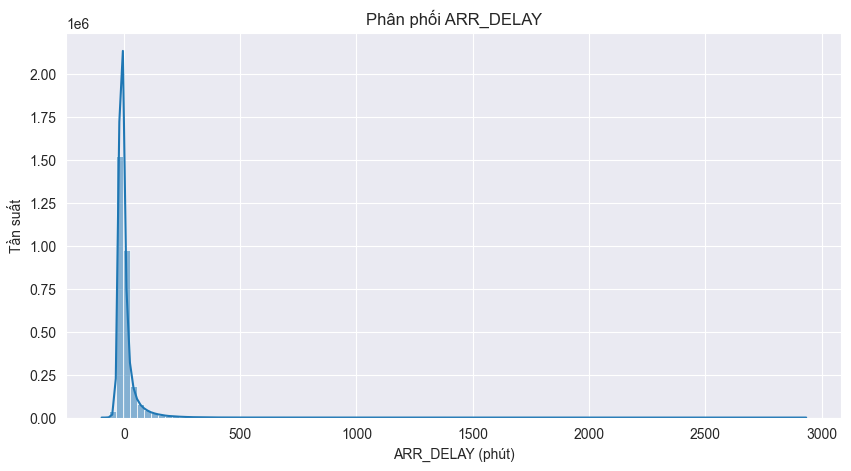

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(df['ARR_DELAY'], bins=100, kde=True)
plt.title("Phân phối ARR_DELAY")
plt.xlabel("ARR_DELAY (phút)")
plt.ylabel("Tần suất")
plt.show()

Vẽ Boxplot để XÁC NHẬN outlier

Biểu đồ lệch phải mạnh và có độ nhọn cao, chứng tỏ có 1 số outliers và đa phần dữ liệu tập trung mạnh

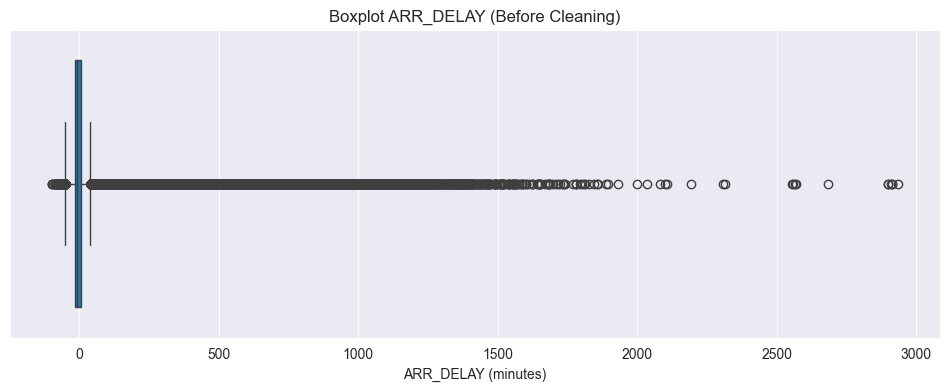

In [22]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['ARR_DELAY'])
plt.title("Boxplot ARR_DELAY (Before Cleaning)")
plt.xlabel("ARR_DELAY (minutes)")
plt.show()

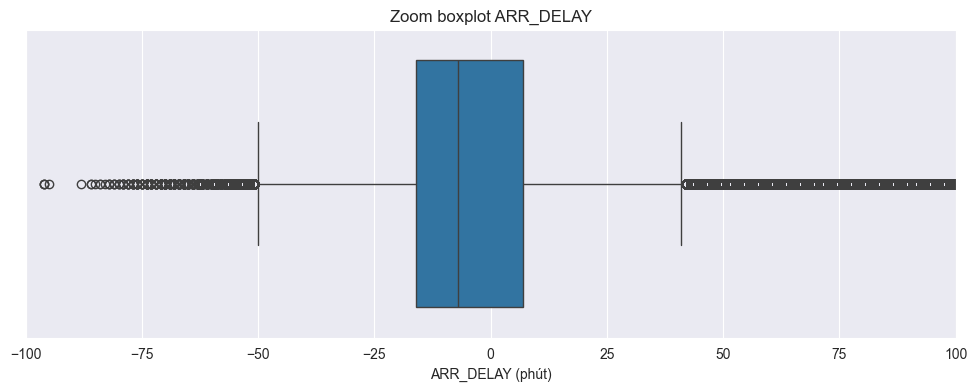

In [23]:
plt.figure(figsize=(12,4))
sns.boxplot(x=df['ARR_DELAY'])
plt.xlim(-100, 100)   # Giới hạn vùng nhìn
plt.title("Zoom boxplot ARR_DELAY")
plt.xlabel("ARR_DELAY (phút)")
plt.show()

Sau khi phóng to vùng chính của boxplot ARR_DELAY, có thể thấy phân phối thời gian đến thực tế tập trung rất mạnh trong vùng nhỏ từ khoảng −15 đến +5 phút. Đây cũng chính là khoảng IQR (interquartile range), cho thấy 50% số chuyến bay đến sớm hoặc trễ không quá 15 phút.

Median nằm xấp xỉ 0 phút, nghĩa là phần lớn chuyến bay đến đúng giờ hoặc đến sớm nhẹ.

Whisker dưới kéo dài đến khoảng −50 phút, phản ánh việc nhiều chuyến bay hạ cánh sớm hơn lịch trình. Whisker trên chỉ đến khoảng +40 phút, cho thấy các chuyến bay trễ nhẹ (dưới 40 phút) là phổ biến.

Tuy nhiên, bên ngoài whisker xuất hiện rất nhiều outlier trễ nặng, trong đó có những giá trị lên đến hơn 1000–3000 phút. Đây chủ yếu là những chuyến bay bị hủy hoặc diverted, không đại diện cho hành vi delay thông thường của hành khách.

Tuy nhiên sẽ không cắt outlier theo IQR, bới vì theo box plot những chuyến bay trễ từ 40 phút và sớm hơn 50 phút được xem là outlier.
Nhưng thực tế trễ 40, 60, 80 phút là chuyện cực bình thường trong dữ liệu máy bay. Sẽ xứ lí cắt theo domain.
Cắt theo domain nghĩa là cắt outlier dựa trên kiến thức thực tế (nghiệp vụ) của lĩnh vực hàng không

In [24]:
outlier_mask = (df['ARR_DELAY'] < -60) | (df['ARR_DELAY'] > 300)
outlier_count = outlier_mask.sum()

outlier_count


np.int64(10984)

In [25]:
outlier_ratio = outlier_count / len(df) * 100
outlier_ratio

np.float64(0.3769645295047501)

In [26]:
before = len(df)
df = df[df['ARR_DELAY'].between(-60, 300)]
after = len(df)
print("Số dòng ban đầu:", before)
print("Số dòng sau khi cắt:", after)
print("Số dòng bị cắt:", before - after)
print("Tỷ lệ bị cắt: {:.2f}%".format((before - after) / before * 100))

Số dòng ban đầu: 2913802
Số dòng sau khi cắt: 2902818
Số dòng bị cắt: 10984
Tỷ lệ bị cắt: 0.38%


Vẽ lại histogram & boxplot

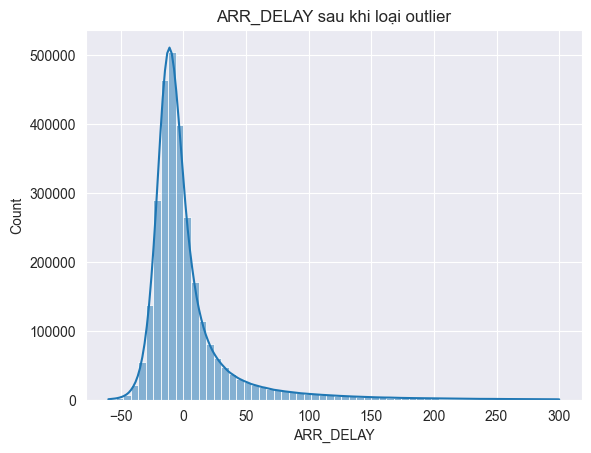

In [27]:
sns.histplot(df['ARR_DELAY'], bins=60, kde=True)
plt.title("ARR_DELAY sau khi loại outlier")
plt.show()

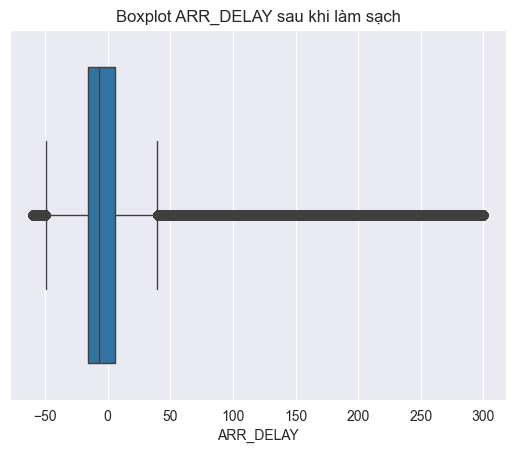

In [28]:
sns.boxplot(x=df['ARR_DELAY'])
plt.title("Boxplot ARR_DELAY sau khi làm sạch")
plt.show()

Delay theo nhóm

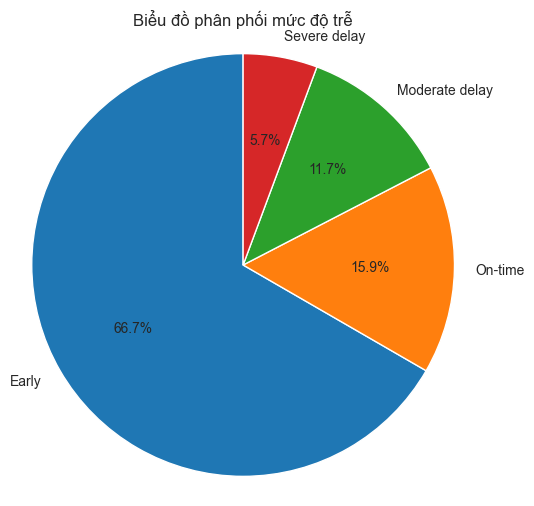

In [29]:
df["delay_group"] = pd.cut(
    df["ARR_DELAY"],
    bins=[-100, 0, 15, 60, 300],
    labels=["Early", "On-time", "Moderate delay", "Severe delay"]
)
delay_ratio = df["delay_group"].value_counts(normalize=True).sort_index() * 100
plt.figure(figsize=(6,6))

plt.pie(
    delay_ratio,
    labels=delay_ratio.index,
    autopct="%.1f%%",
    startangle=90
)

plt.title("Biểu đồ phân phối mức độ trễ")
plt.axis("equal")
plt.show()

Thời gian đến sớm (Early) chiếm ưu thế tuyệt đối: Phần lớn các chuyến (chiếm 66.7%) đến sớm.

Các trường hợp trễ ở mức độ nghiêm trọng (Severe delay) rất thấp: Tỷ lệ trễ nghiêm trọng chỉ là 5.7%. Điều này cho thấy các sự cố lớn, gây ảnh hưởng đáng kể đến lịch trình là hiếm gặp.

Trường hợp đến đúng giờ (On-time) khá tốt: Các chuyến đến đúng giờ chiếm 15.9%.

Trễ ở mức độ vừa phải (Moderate delay) là điểm cần theo dõi: Tỷ lệ trễ vừa phải (trễ ở mức độ trung bình) là 11.7%. Mặc dù không cao như tỷ lệ đến sớm, đây là nhóm lớn thứ hai sau "Early" và lớn hơn đáng kể so với "Severe delay".

EDA các biến categorical

Tần suất hãng bay

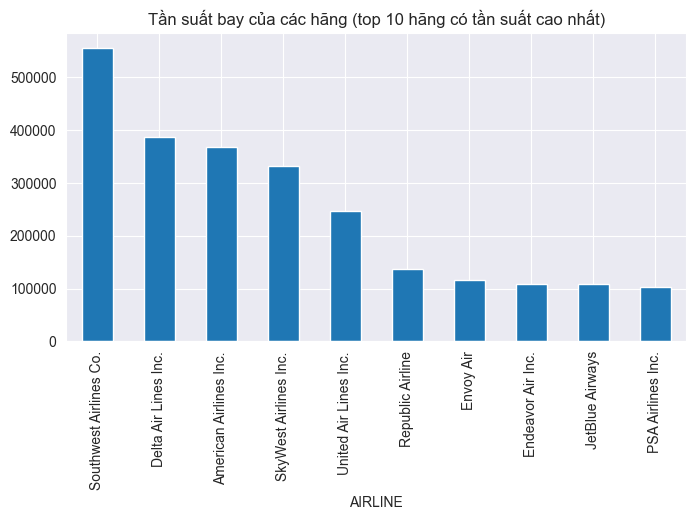

In [30]:
airline_cnt = df["AIRLINE"].value_counts()

plt.figure(figsize=(8,4))
airline_cnt.head(10).plot(kind="bar")
plt.title("Tần suất bay của các hãng (top 10 hãng có tần suất cao nhất)")
plt.show()

Tần suất bay phân thành các nhóm rõ rệt, điều này rất quan trọng khi xem xét vai trò của biến AIRLINE trong mô hình
* Hạng 1 (Dẫn Đầu): Southwest Airlines Co. > 500.000
* Hạng 2: Delta, American, SkyWest, United 250.000 - 400.000
* Hạng 3: Republic, Envoy, Endeavor, JetBlue, PSA < 150.000

Delay trung bình theo hãng

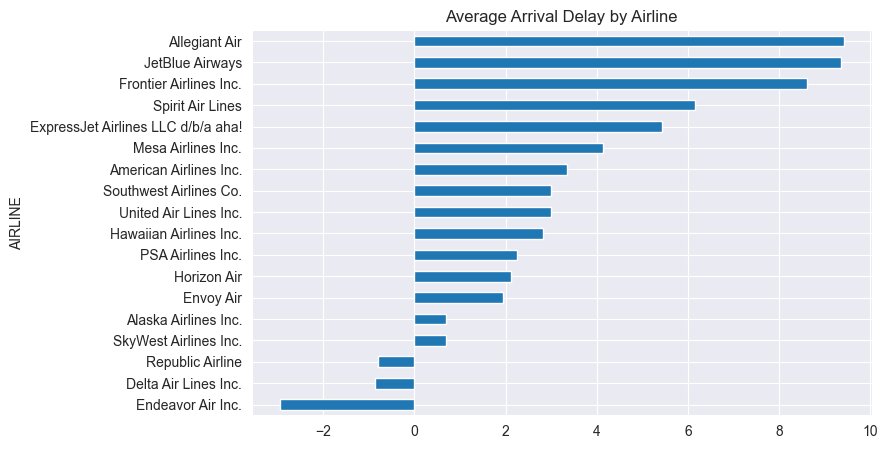

In [31]:
airline_delay = df.groupby("AIRLINE")["ARR_DELAY"].mean().sort_values()
plt.figure(figsize=(8,5))
airline_delay.plot(kind="barh")
plt.title("Average Arrival Delay by Airline")
plt.show()

In [32]:
from scipy.stats import f_oneway

# Loại missing
df_anova = df[['ARR_DELAY', 'AIRLINE']].dropna()

# Gom delay theo từng hãng
groups = [
    df_anova[df_anova['AIRLINE'] == airline]['ARR_DELAY']
    for airline in df_anova['AIRLINE'].unique()
]

F_stat, p_value = f_oneway(*groups)

print("F-statistic:", F_stat)
print("p-value:", p_value)


F-statistic: 1059.097471877093
p-value: 0.0


Delay theo sân bay đi (top 20)

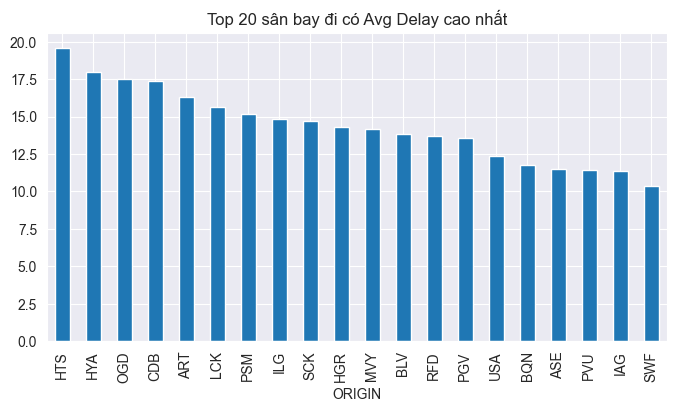

In [33]:
origin_delay = (
    df.groupby("ORIGIN")["ARR_DELAY"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

origin_delay.plot(kind="bar", figsize=(8,4))
plt.title("Top 20 sân bay đi có Avg Delay cao nhất")
plt.show()

In [34]:
# Lấy top 20 sân bay có nhiều chuyến nhất
top_airports = df['ORIGIN'].value_counts().head(20).index

df_anova = df[df['ORIGIN'].isin(top_airports)]
df_anova = df_anova[['ARR_DELAY', 'ORIGIN']].dropna()
groups = []
for airport in df_anova['ORIGIN'].unique():
    groups.append(
        df_anova[df_anova['ORIGIN'] == airport]['ARR_DELAY']
    )

# Thực hiện ANOVA
F_stat, p_value = f_oneway(*groups)

print("F-statistic:", F_stat)
print("p-value:", p_value)

F-statistic: 420.4020679864592
p-value: 0.0


DELAY theo sân bay đến (top20)

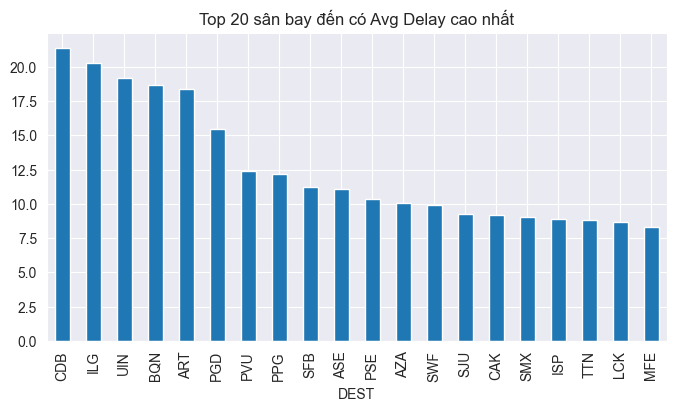

In [35]:
dest_delay = (
    df.groupby("DEST")["ARR_DELAY"]
    .mean()
    .sort_values(ascending=False)
    .head(20)
)

dest_delay.plot(kind="bar", figsize=(8,4))
plt.title("Top 20 sân bay đến có Avg Delay cao nhất")
plt.show()

In [36]:
# Lấy top 20 sân bay đến có nhiều chuyến nhất
top_airports = df['DEST'].value_counts().head(20).index

df_anova = df[df['DEST'].isin(top_airports)]
df_anova = df_anova[['ARR_DELAY', 'DEST']].dropna()
groups = []
for airport in df_anova['DEST'].unique():
    groups.append(
        df_anova[df_anova['DEST'] == airport]['ARR_DELAY']
    )

# Thực hiện ANOVA
F_stat, p_value = f_oneway(*groups)

print("F-statistic:", F_stat)
print("p-value:", p_value)

F-statistic: 342.00915463774436
p-value: 0.0


**EDA biến thời gian**

FL_DATE – theo năm

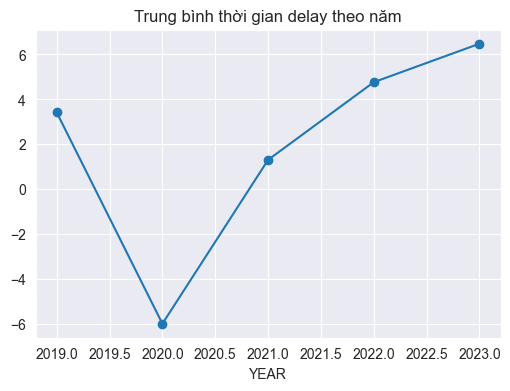

In [37]:
df["YEAR"] = df["FL_DATE"].dt.year

year_delay = df.groupby("YEAR")["ARR_DELAY"].mean()

year_delay.plot(marker="o", figsize=(6,4))
plt.title("Trung bình thời gian delay theo năm")
plt.show()


Giai đoạn 2019 - 2020: Sự sụt giảm mạnh (Giảm delay)
Giai đoạn 2020 - 2023: Xu hướng tăng liên tục (Tăng delay trở lại)
Nguyên nhân chính có thể do COVID-19

In [38]:
from scipy.stats import f_oneway
years = sorted(df["YEAR"].unique())

year_groups = [
    df[(df["YEAR"] == y) & (df["ARR_DELAY"] > 0)]["ARR_DELAY"].dropna()
    for y in years
]

anova_year = f_oneway(*year_groups)
anova_year


F_onewayResult(statistic=np.float64(981.7455953724449), pvalue=np.float64(0.0))

Kiểm định ANOVA một yếu tố cho thấy sự khác biệt có ý nghĩa thống kê về thời gian trễ chuyến bay giữa các năm
(F = 981.75, p < 0.001), cho thấy độ trễ thay đổi đáng kể theo thời gian. Tuy nhiên sẽ khồng lấy biến này làm model vì không phù hợp input đầu vào của đề tài.

EDA THEO THÁNG

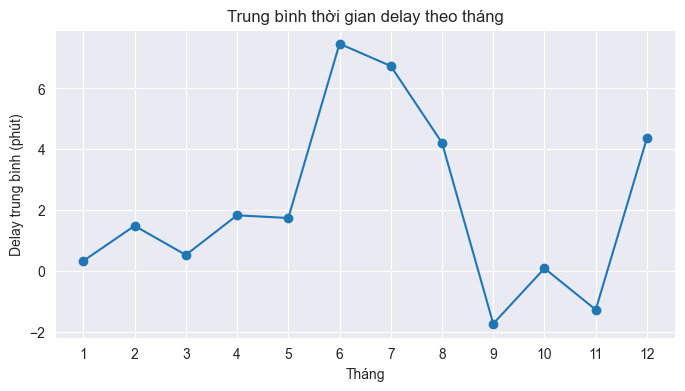

In [39]:
df["MONTH"] =  df["FL_DATE"].dt.month
month_delay = df.groupby("MONTH")["ARR_DELAY"].mean()
plt.figure(figsize=(8,4))
plt.plot(month_delay.index, month_delay.values, marker="o")

plt.xticks(range(1, 13))
plt.title("Trung bình thời gian delay theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Delay trung bình (phút)")
plt.grid(True)

plt.show()


Các tháng cao điểm có khả năng trễ cao là tháng 6,7,8 và 12. Tháng ít / gần như không trễ là các tháng còn lại.

In [40]:
month_groups = [
    df[(df["MONTH"] == m) & (df["ARR_DELAY"] > 0)]["ARR_DELAY"].dropna()
    for m in range(1, 13)
]

anova_month = f_oneway(*month_groups)
anova_month


F_onewayResult(statistic=np.float64(438.45749722227157), pvalue=np.float64(0.0))

Kiểm định ANOVA một yếu tố cho thấy thời gian trễ chuyến bay khác biệt có ý nghĩa thống kê giữa các tháng trong năm
(F = 438.46, p < 0.001), xác nhận sự tồn tại của yếu tố mùa vụ trong độ trễ chuyến bay.


EDA THEO NGÀY TRONG THÁNG (1–31)

In [41]:
df["DAY"] = df["FL_DATE"].dt.day

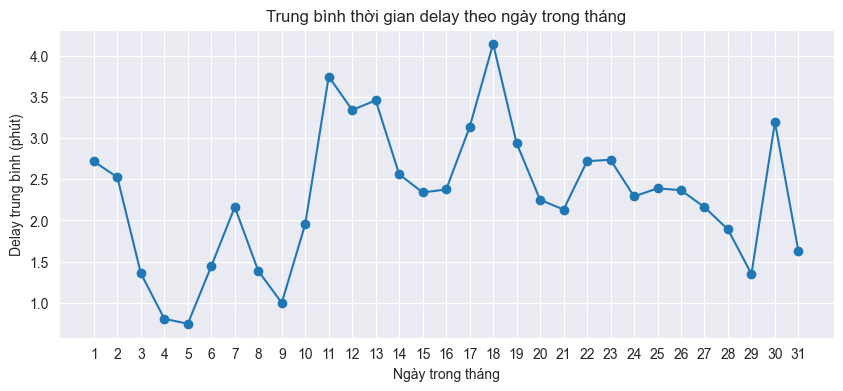

In [42]:
day_delay = df.groupby("DAY")["ARR_DELAY"].mean()
plt.figure(figsize=(10,4))
plt.plot(day_delay.index, day_delay.values, marker="o")

plt.xticks(range(1, 32))
plt.title("Trung bình thời gian delay theo ngày trong tháng")
plt.xlabel("Ngày trong tháng")
plt.ylabel("Delay trung bình (phút)")
plt.grid(True)
plt.show()


In [43]:
day_groups = [
    df[(df["DAY"] == d) & (df["ARR_DELAY"] > 0)]["ARR_DELAY"].dropna()
    for d in range(1, 32)
]

anova_day = f_oneway(*day_groups)
anova_day


F_onewayResult(statistic=np.float64(14.332288999784483), pvalue=np.float64(2.477433422721067e-72))

Ngày trong tháng có ảnh hưởng thống kê đến độ trễ chuyến bay nhưng mức độ yếu hơn so với các yếu tố thời gian chính như giờ hoặc tháng.

EDA THEO THỨ TRONG TUẦN

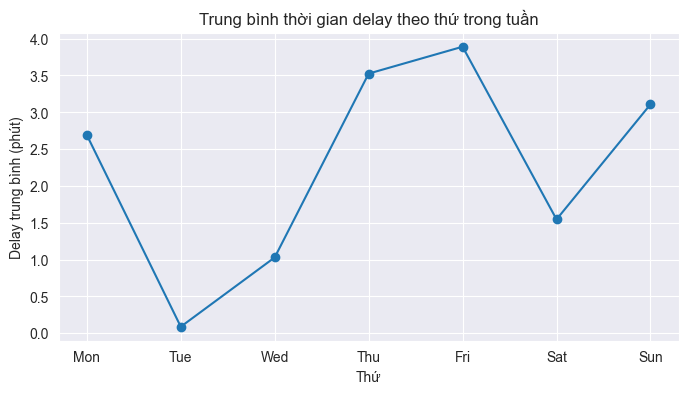

In [44]:
df["FL_DATE"] = pd.to_datetime(df["FL_DATE"])
df["WEEKDAY"] = df["FL_DATE"].dt.weekday
weekday_delay = df.groupby("WEEKDAY")["ARR_DELAY"].mean()
plt.figure(figsize=(8,4))
plt.plot(
    ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"],
    weekday_delay.values,
    marker="o"
)
plt.title("Trung bình thời gian delay theo thứ trong tuần")
plt.xlabel("Thứ")
plt.ylabel("Delay trung bình (phút)")
plt.grid(True)

plt.show()


Thứ 2,5,6,CN có khả năng delay cao

In [45]:
weekday_groups = [
    df[(df["WEEKDAY"] == d) & (df["ARR_DELAY"] > 0)]["ARR_DELAY"].dropna()
    for d in range(7)
]

anova_weekday = f_oneway(*weekday_groups)
anova_weekday


F_onewayResult(statistic=np.float64(65.67604895897094), pvalue=np.float64(5.51142783474252e-82))

Kết quả cho thấy sự khác biệt có ý nghĩa thống kê về thời gian chậm trễ đến trung bình giữa các ngày trong tuần
(F = 65,68, p < 0,001). Điều này cho thấy ngày trong tuần là một yếu tố thời gian quan trọng
ảnh hưởng đến mô hình chậm trễ chuyến bay.

CRS_DEP_TIME

In [46]:
df.head()

,FL_DATE,AIRLINE,ORIGIN,DEST,CRS_DEP_TIME,DEP_DELAY,CRS_ARR_TIME,ARR_DELAY,CRS_ELAPSED_TIME,DISTANCE,delay_group,YEAR,MONTH,DAY,WEEKDAY
0,2019-01-09,United Air Lines Inc.,FLL,EWR,1155,-4.0,1501,-14.0,186.0,1065.0,Early,2019,1,9,2
1,2022-11-19,Delta Air Lines Inc.,MSP,SEA,2120,-6.0,2315,-5.0,235.0,1399.0,Early,2022,11,19,5
2,2022-07-22,United Air Lines Inc.,DEN,MSP,954,6.0,1252,0.0,118.0,680.0,Early,2022,7,22,4
3,2023-03-06,Delta Air Lines Inc.,MSP,SFO,1609,-1.0,1829,24.0,260.0,1589.0,Moderate delay,2023,3,6,0
4,2020-02-23,Spirit Air Lines,MCO,DFW,1840,-2.0,2041,-1.0,181.0,985.0,Early,2020,2,23,6


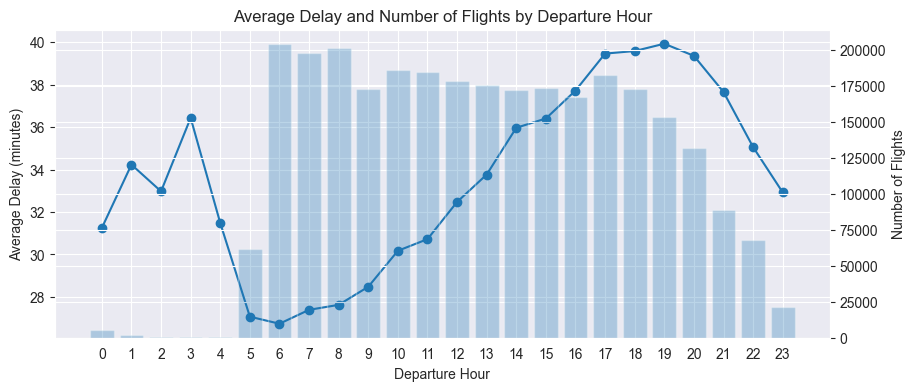

In [47]:
# Tách giờ cất cánh
df["dep_hour"] = df["CRS_DEP_TIME"] // 100

# Delay trung bình (chỉ lấy delay dương)
hour_delay = (
    df[df["ARR_DELAY"] > 0]
    .groupby("dep_hour")["ARR_DELAY"]
    .mean()
    .reindex(range(24))
)

# Số lượng chuyến bay theo giờ (KHÔNG lọc delay)
hour_count = (
    df.groupby("dep_hour")
    .size()
    .reindex(range(24), fill_value=0)
)

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10,4))

# Trục trái: Delay
ax1.plot(hour_delay.index, hour_delay.values, marker="o")
ax1.set_xlabel("Departure Hour")
ax1.set_ylabel("Average Delay (minutes)")
ax1.set_xticks(range(24))
ax1.grid(True)

# Trục phải: Số chuyến bay
ax2 = ax1.twinx()
ax2.bar(hour_count.index, hour_count.values, alpha=0.3)
ax2.set_ylabel("Number of Flights")

plt.title("Average Delay and Number of Flights by Departure Hour")
plt.show()


Khung giờ cao điểm nhất là khung giờ chiều - tối từ 16h đến 21h.
Khung giờ cao điểm sáng là từ 0h đến 4h.
Tổng số chuyến bay khởi hành trong 1 khung giờ cao không đồng nghĩa khả năng chuyến bay cất cánh trong khung giờ đó có khả năng trễ cao và ngược lại

In [48]:
from scipy.stats import f_oneway

groups = [
    df[(df["dep_hour"] == h) & (df["ARR_DELAY"] > 0)]["ARR_DELAY"].dropna()
    for h in range(24)
]

anova_result = f_oneway(*groups)
anova_result


F_onewayResult(statistic=np.float64(439.5336306631939), pvalue=np.float64(0.0))

Giá trị F rất lớn (439.53) cho thấy mức độ biến thiên của thời gian trễ giữa các nhóm giờ khác nhau lớn hơn rất nhiều, tức là Giờ cất cánh là một yếu tố có ảnh hưởng mạnh đến thời gian trễ chuyến bay. Giá trị p-value cực kỳ nhỏ cho phép bác bỏ giả thuyết không (H₀) rằng thời gian trễ trung bình là như nhau ở tất cả các giờ cất cánh.

CRS_ARR_TIME

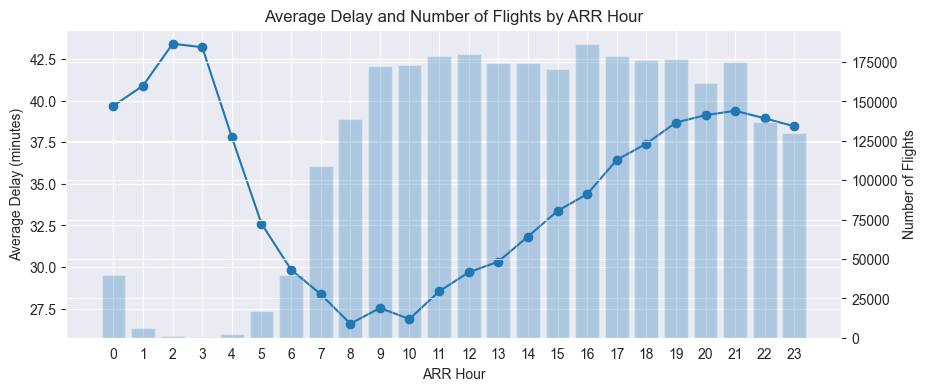

In [49]:
df["arr_hour"] = df["CRS_ARR_TIME"] // 100

# Delay trung bình (chỉ lấy delay dương)
hour_delay = (
    df[df["ARR_DELAY"] > 0]
    .groupby("arr_hour")["ARR_DELAY"]
    .mean()
    .reindex(range(24))
)

# Số lượng chuyến bay theo giờ (KHÔNG lọc delay)
hour_count = (
    df.groupby("arr_hour")
    .size()
    .reindex(range(24), fill_value=0)
)

# Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10,4))

# Trục trái: Delay
ax1.plot(hour_delay.index, hour_delay.values, marker="o")
ax1.set_xlabel("ARR Hour")
ax1.set_ylabel("Average Delay (minutes)")
ax1.set_xticks(range(24))
ax1.grid(True)

# Trục phải: Số chuyến bay
ax2 = ax1.twinx()
ax2.bar(hour_count.index, hour_count.values, alpha=0.3)
ax2.set_ylabel("Number of Flights")

plt.title("Average Delay and Number of Flights by ARR Hour")
plt.show()


CRS_ELAPSED_TIME

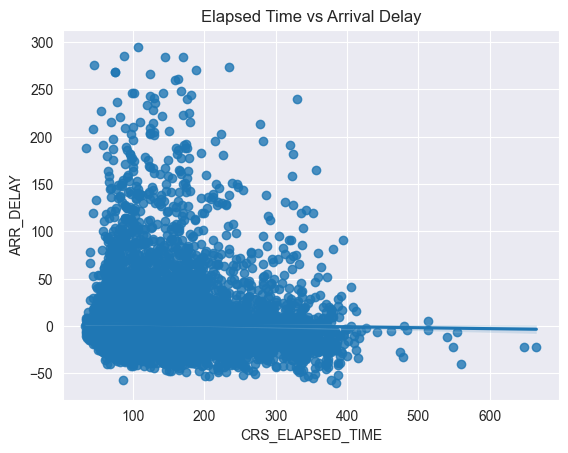

In [50]:
sns.regplot(
    x="CRS_ELAPSED_TIME",
    y="ARR_DELAY",
    data=df.sample(10000))
plt.title("Elapsed Time vs Arrival Delay")
plt.show()

In [51]:
corr = df['CRS_ELAPSED_TIME'].corr(df['ARR_DELAY'])
print(corr)

-0.007708736754796175


Hệ số hồi quy quá nhỏ ~ 0, phương sai không đồng đều. Thời gian bay ngắn → delay trải rộng (−50 đến 300) trong khi Thời gian bay dài → delay co cụm quanh 0

Quan hệ phi tuyến

Bay dài → delay “ít nghiêm trọng hơn”

DEP_DELAY (Thời gian trễ khởi hành)

In [52]:
# Thống kê mô tả DEP_DELAY
print("="*50)
print("THỐNG KÊ MÔ TẢ DEP_DELAY")
print("="*50)
print(df['DEP_DELAY'].describe())

THỐNG KÊ MÔ TẢ DEP_DELAY
count    2.902818e+06
mean     8.107363e+00
std      3.243750e+01
min     -9.000000e+01
25%     -6.000000e+00
50%     -2.000000e+00
75%      6.000000e+00
max      3.990000e+02
Name: DEP_DELAY, dtype: float64


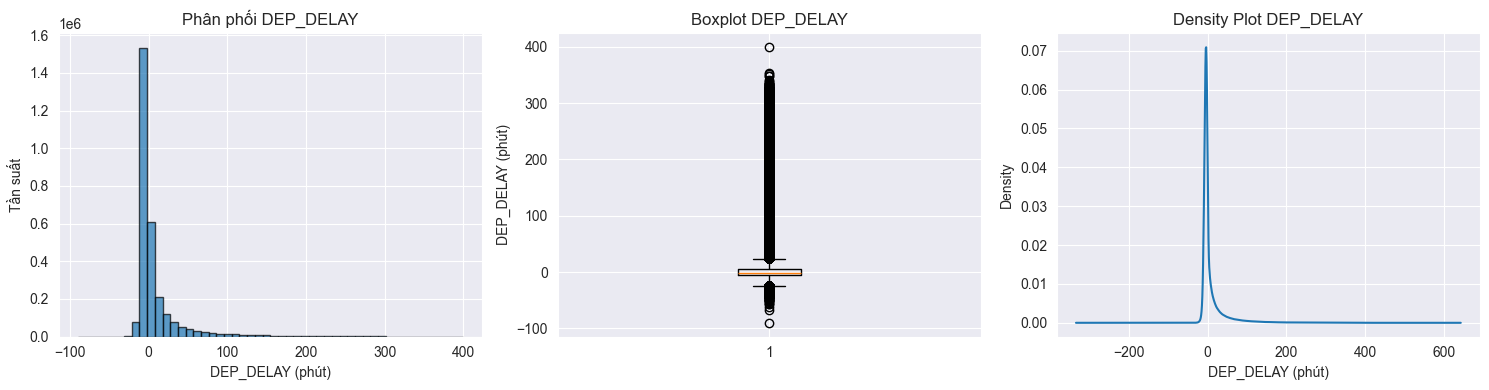

In [53]:
# Phân phối DEP_DELAY
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histogram
axes[0].hist(df['DEP_DELAY'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('DEP_DELAY (phút)')
axes[0].set_ylabel('Tần suất')
axes[0].set_title('Phân phối DEP_DELAY')

# Boxplot
axes[1].boxplot(df['DEP_DELAY'])
axes[1].set_ylabel('DEP_DELAY (phút)')
axes[1].set_title('Boxplot DEP_DELAY')

# KDE plot
df['DEP_DELAY'].plot(kind='kde', ax=axes[2])
axes[2].set_xlabel('DEP_DELAY (phút)')
axes[2].set_title('Density Plot DEP_DELAY')

plt.tight_layout()
plt.show()


Tương quan Pearson giữa DEP_DELAY và ARR_DELAY: 0.9256


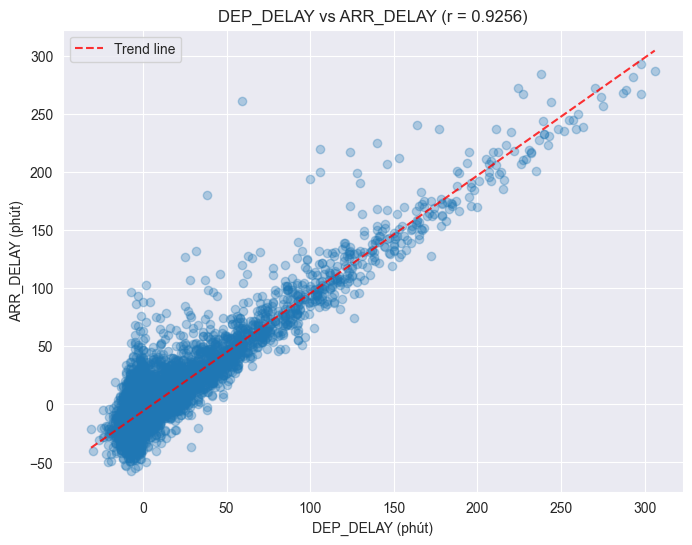

In [54]:
# Tương quan DEP_DELAY với ARR_DELAY
correlation = df['DEP_DELAY'].corr(df['ARR_DELAY'])
print(f"\nTương quan Pearson giữa DEP_DELAY và ARR_DELAY: {correlation:.4f}")

plt.figure(figsize=(8, 6))
sample = df.sample(min(10000, len(df)))
plt.scatter(sample['DEP_DELAY'], sample['ARR_DELAY'], alpha=0.3)
plt.xlabel('DEP_DELAY (phút)')
plt.ylabel('ARR_DELAY (phút)')
plt.title(f'DEP_DELAY vs ARR_DELAY (r = {correlation:.4f})')

# Thêm đường hồi quy
z = np.polyfit(sample['DEP_DELAY'], sample['ARR_DELAY'], 1)
p = np.poly1d(z)
plt.plot(sample['DEP_DELAY'].sort_values(), p(sample['DEP_DELAY'].sort_values()), 
         "r--", alpha=0.8, label='Trend line')
plt.legend()
plt.show()

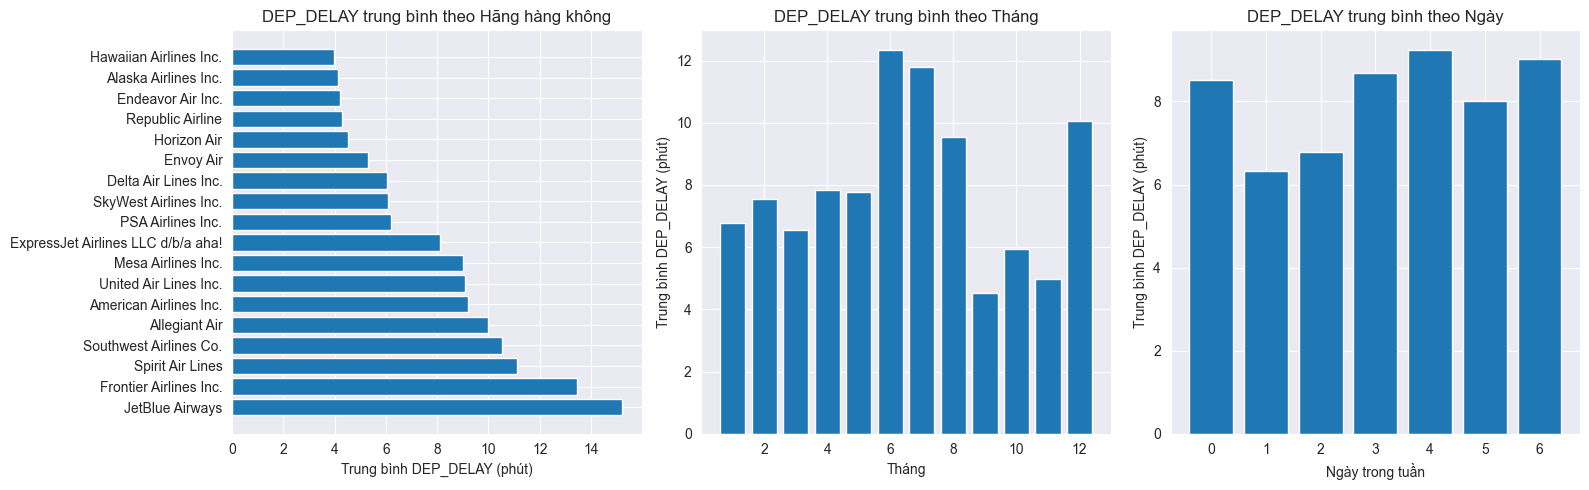

In [55]:
# DEP_DELAY theo các biến categorical
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Theo AIRLINE
airline_delay = df.groupby('AIRLINE')['DEP_DELAY'].mean().sort_values(ascending=False)
axes[0].barh(airline_delay.index, airline_delay.values)
axes[0].set_xlabel('Trung bình DEP_DELAY (phút)')
axes[0].set_title('DEP_DELAY trung bình theo Hãng hàng không')

# Theo MONTH
month_delay = df.groupby('MONTH')['DEP_DELAY'].mean()
axes[1].bar(month_delay.index, month_delay.values)
axes[1].set_xlabel('Tháng')
axes[1].set_ylabel('Trung bình DEP_DELAY (phút)')
axes[1].set_title('DEP_DELAY trung bình theo Tháng')

# Theo WEEKDAY
weekday_delay = df.groupby('WEEKDAY')['DEP_DELAY'].mean()
axes[2].bar(weekday_delay.index, weekday_delay.values)
axes[2].set_xlabel('Ngày trong tuần')
axes[2].set_ylabel('Trung bình DEP_DELAY (phút)')
axes[2].set_title('DEP_DELAY trung bình theo Ngày')

plt.tight_layout()
plt.show()

ANOVA cho DEP_DELAY

In [56]:
# ANOVA cho DEP_DELAY
from scipy.stats import f_oneway

print("="*50)
print("ANOVA TEST cho DEP_DELAY")
print("="*50)

# ANOVA theo AIRLINE
groups_airline = [group['DEP_DELAY'].values for name, group in df.groupby('AIRLINE')]
f_stat, p_value = f_oneway(*groups_airline)
print(f"\n1. ANOVA DEP_DELAY theo AIRLINE:")
print(f"   F-statistic: {f_stat:.4f}")
print(f"   P-value: {p_value:.4e}")
print(f"   Kết luận: {'Có sự khác biệt có ý nghĩa' if p_value < 0.05 else 'Không có sự khác biệt có ý nghĩa'}")

# ANOVA theo MONTH
groups_month = [group['DEP_DELAY'].values for name, group in df.groupby('MONTH')]
f_stat, p_value = f_oneway(*groups_month)
print(f"\n2. ANOVA DEP_DELAY theo MONTH:")
print(f"   F-statistic: {f_stat:.4f}")
print(f"   P-value: {p_value:.4e}")
print(f"   Kết luận: {'Có sự khác biệt có ý nghĩa' if p_value < 0.05 else 'Không có sự khác biệt có ý nghĩa'}")

# ANOVA theo WEEKDAY
groups_weekday = [group['DEP_DELAY'].values for name, group in df.groupby('WEEKDAY')]
f_stat, p_value = f_oneway(*groups_weekday)
print(f"\n3. ANOVA DEP_DELAY theo WEEKDAY:")
print(f"   F-statistic: {f_stat:.4f}")
print(f"   P-value: {p_value:.4e}")
print(f"   Kết luận: {'Có sự khác biệt có ý nghĩa' if p_value < 0.05 else 'Không có sự khác biệt có ý nghĩa'}")

# ANOVA theo dep_hour
groups_hour = [group['DEP_DELAY'].values for name, group in df.groupby('dep_hour')]
f_stat, p_value = f_oneway(*groups_hour)
print(f"\n4. ANOVA DEP_DELAY theo dep_hour:")
print(f"   F-statistic: {f_stat:.4f}")
print(f"   P-value: {p_value:.4e}")
print(f"   Kết luận: {'Có sự khác biệt có ý nghĩa' if p_value < 0.05 else 'Không có sự khác biệt có ý nghĩa'}")

ANOVA TEST cho DEP_DELAY

1. ANOVA DEP_DELAY theo AIRLINE:
   F-statistic: 1268.8320
   P-value: 0.0000e+00
   Kết luận: Có sự khác biệt có ý nghĩa

2. ANOVA DEP_DELAY theo MONTH:
   F-statistic: 1446.0238
   P-value: 0.0000e+00
   Kết luận: Có sự khác biệt có ý nghĩa

3. ANOVA DEP_DELAY theo WEEKDAY:
   F-statistic: 494.7239
   P-value: 0.0000e+00
   Kết luận: Có sự khác biệt có ý nghĩa

4. ANOVA DEP_DELAY theo dep_hour:
   F-statistic: 2332.6696
   P-value: 0.0000e+00
   Kết luận: Có sự khác biệt có ý nghĩa


**Nhận xét về DEP_DELAY:**
- DEP_DELAY có tương quan rất cao với ARR_DELAY vì chuyến bay trễ khởi hành thường cũng trễ khi đến
- Đây là feature mạnh nhất để dự đoán ARR_DELAY
- Lưu ý: DEP_DELAY chỉ biết được sau khi máy bay đã khởi hành, nên phù hợp cho việc dự đoán ARR_DELAY sau khi bay đã cất cánh

DISTANCE

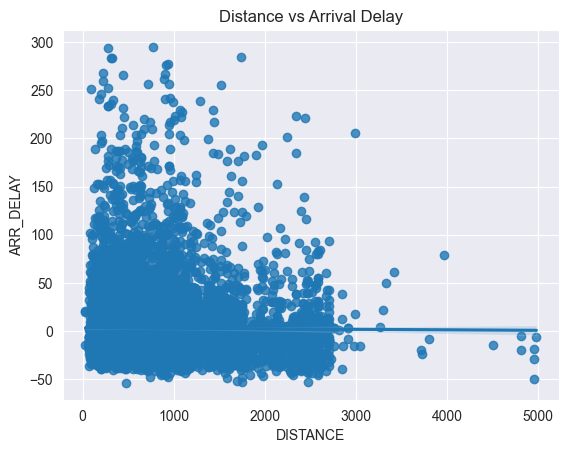

In [57]:
sns.regplot(
    x="DISTANCE",
    y="ARR_DELAY",
    data=df.sample(10000))
plt.title("Distance vs Arrival Delay")
plt.show()

In [58]:
corr = df['DISTANCE'].corr(df['ARR_DELAY'])
print(corr)

-0.00035391886697257364


Hệ số hồi quy quá nhỏ ~ 0, phương sai không đồng đều. Khoảng cách bay ngắn → delay trải rộng (−50 đến 300) trong khi khoảng cách bay dài → delay co cụm quanh 0

Quan hệ phi tuyến

Bay xa → delay “ít nghiêm trọng hơn”

Correlation (numerical)

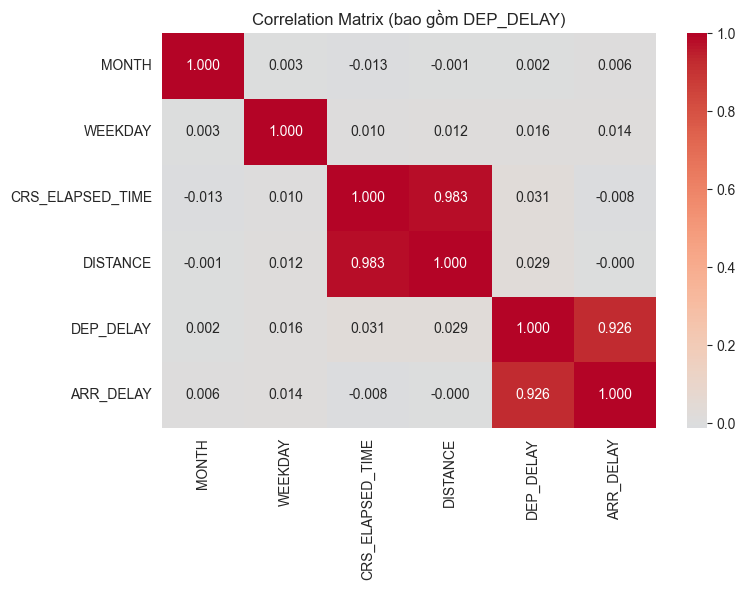

In [59]:
# Thêm DEP_DELAY vào ma trận tương quan
num_cols = [
    "MONTH", "WEEKDAY",
    "CRS_ELAPSED_TIME", "DISTANCE",
    "DEP_DELAY", "ARR_DELAY"
]

plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", center=0, fmt='.3f')
plt.title("Correlation Matrix (bao gồm DEP_DELAY)")
plt.tight_layout()
plt.show()

Không có tương quan tuyến tính mạnh

Tóm lại các biến nên giữ lại để làm model là: AIRLINE, ORIGIN, DEST, MONTH, WEEKDAY, dep_hour

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

cat_features = ["AIRLINE", "ORIGIN", "DEST"]
# Thêm DEP_DELAY vào num_features
num_features = ["MONTH", "WEEKDAY", "dep_hour", "DEP_DELAY"]

X = df[cat_features + num_features]
y = df["ARR_DELAY"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(), num_features),
    ]
)

pipeline_lr = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", LinearRegression())
    ]
)

pipeline_lr.fit(X_train, y_train)


,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('num', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Thử mô hình

In [61]:
# ===== Lấy preprocessor và model đã fit =====
preprocessor = pipeline_lr.named_steps["preprocess"]
model = pipeline_lr.named_steps["model"]

# ===== Lấy tên biến sau OneHotEncoder =====
cat_feature_names = (
    preprocessor
    .named_transformers_["cat"]
    .get_feature_names_out(cat_features)
)

# ===== Biến số (sau StandardScaler giữ nguyên tên) =====
num_feature_names = num_features

# ===== Gộp tất cả tên biến =====
feature_names = list(cat_feature_names) + list(num_feature_names)

# ===== Lấy hệ số =====
coefficients = model.coef_

# ===== Ghép thành bảng =====
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefficients
})

# Sắp xếp theo độ lớn tuyệt đối
coef_df["abs_coefficient"] = coef_df["coefficient"].abs()
coef_df = coef_df.sort_values("abs_coefficient", ascending=False)

# ===== In kết quả =====
print(coef_df)

        feature  coefficient  abs_coefficient
781   DEP_DELAY    32.803852        32.803852
767    DEST_VCT   -14.887101        14.887101
359  ORIGIN_SPN    13.007558        13.007558
372  ORIGIN_TBN   -12.652211        12.652211
414    DEST_ALS    -9.920950         9.920950
..          ...          ...              ...
363  ORIGIN_STL     0.005993         0.005993
259  ORIGIN_MOB    -0.003796         0.003796
738    DEST_SPI     0.003502         0.003502
676    DEST_PIB    -0.003049         0.003049
692    DEST_PVD     0.001986         0.001986

[782 rows x 3 columns]


In [62]:
coef_df.head(20)

,feature,coefficient,abs_coefficient
781,DEP_DELAY,32.803852,32.803852
767,DEST_VCT,-14.887101,14.887101
359,ORIGIN_SPN,13.007558,13.007558
372,ORIGIN_TBN,-12.652211,12.652211
414,DEST_ALS,-9.920950,9.920950
200,ORIGIN_IPT,-9.473923,9.473923
752,DEST_TBN,-9.413388,9.413388
212,ORIGIN_JST,-8.963153,8.963153
463,DEST_CDB,8.693448,8.693448
387,ORIGIN_VCT,-8.598687,8.598687


Có thể thấy các yếu tố tương quan mạnh đến biến mục tiêu là DEP_DELAY, ORIGIN, DEST

Kết quả phân tích hệ số cho thấy biến DEP_DELAY có hệ số rất lớn (≈32.8), khiến mô hình phụ thuộc mạnh vào độ trễ khởi hành. Điều này dẫn đến việc các chuyến bay có độ trễ nhỏ bị dự đoán ARR_DELAY cao hơn thực tế, làm phân phối giá trị dự đoán lệch đáng kể so với phân phối thật ở vùng delay thấp. Trong khi đó, với các chuyến delay lớn, mô hình cho kết quả chính xác hơn.

In [63]:
y_pred = pipeline_lr.predict(X_test)
residuals = y_test - y_pred

In [64]:
print(y_pred[:10])

[-11.36992385  -7.69179839  15.74950942  68.60593593  19.82480252
   3.9940628   29.52534775 -17.21623039 -11.87738241  -8.3683702 ]


Hàm chạy kết quả dự đoán

In [65]:
def predict_arrival_delay(input_data, model=pipeline_lr):
    """
    input_data: dict, chứa giá trị các biến theo key
        Ví dụ:
        {
            "AIRLINE": "AA",
            "ORIGIN": "JFK",
            "DEST": "LAX",
            "MONTH": 7,
            "WEEKDAY": 3,
            "dep_hour": 14,
            "DEP_DELAY": 5.0
        }
    model: pipeline đã train (mặc định là pipeline_lr)

    Trả về: giá trị dự đoán ARR_DELAY
    """
    # Tạo DataFrame từ input_data, với đúng cột cần thiết
    df_input = pd.DataFrame([input_data])

    # Đảm bảo đầy đủ cột categorical và numeric trong df_input
    # Nếu thiếu cột nào có thể báo lỗi hoặc điền giá trị mặc định (ở đây mình giả sử đủ)

    # Dự đoán
    pred = model.predict(df_input)

    return pred[0]


In [66]:
input_example = {
    "AIRLINE": "AA",
    "ORIGIN": "JFK",
    "DEST": "LAX",
    "MONTH": 7,
    "WEEKDAY": 3,
    "dep_hour": 20,
    "DEP_DELAY": 25
}

result = predict_arrival_delay(input_example)
print(f"Dự đoán thời gian trễ chuyến bay: {result:.2f} phút")


Dự đoán thời gian trễ chuyến bay: 14.37 phút


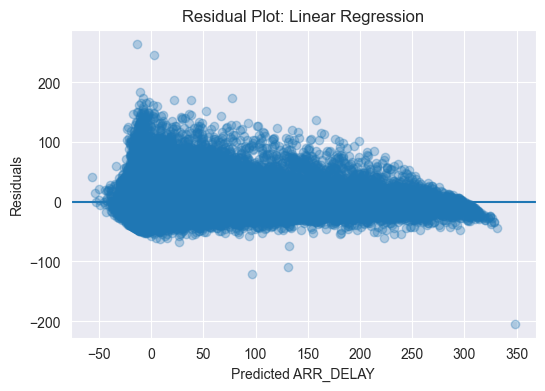

In [67]:

plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0)
plt.xlabel("Predicted ARR_DELAY")
plt.ylabel("Residuals")
plt.title("Residual Plot: Linear Regression")
plt.show()


Các điểm dữ liệu trải ngẫu nhiên quanh trục 0, chứng tỏ mô hình hồi quy tuyến tính là phù hợp

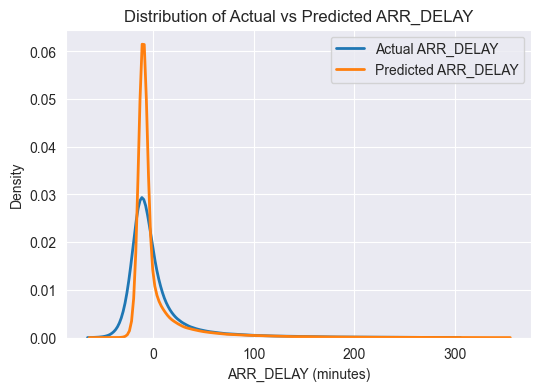

In [68]:
plt.figure(figsize=(6, 4))

sns.kdeplot(y, label="Actual ARR_DELAY", linewidth=2)
sns.kdeplot(y_pred, label="Predicted ARR_DELAY", linewidth=2)

plt.xlabel("ARR_DELAY (minutes)")
plt.ylabel("Density")
plt.title("Distribution of Actual vs Predicted ARR_DELAY")
plt.legend()

plt.show()


Mô hình có xu hướng dự đoán chính xác hơn đối với các chuyến bay trễ lớn, trong khi hiệu suất giảm đối với các trường hợp trễ nhẹ, điều này là do mô hình phụ thuộc nhiều vào DEP_DELAY

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("MAE :", mae)
print("R²  :", r2)


MSE : 175.02432934709563
RMSE: 13.22967608625002
MAE : 9.243580087691283
R²  : 0.8599936358341451


Thử nghiệm mô hình hồi quy đa thức đa biến

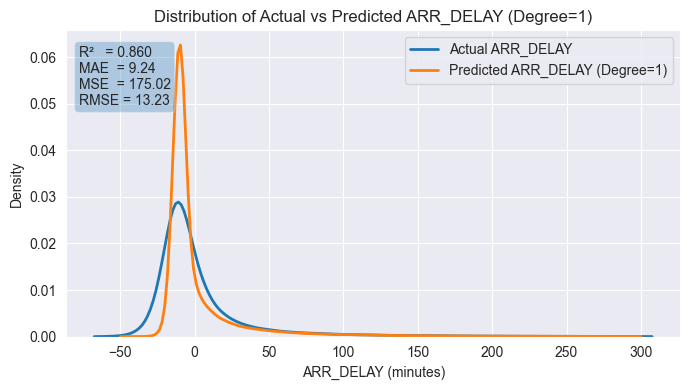

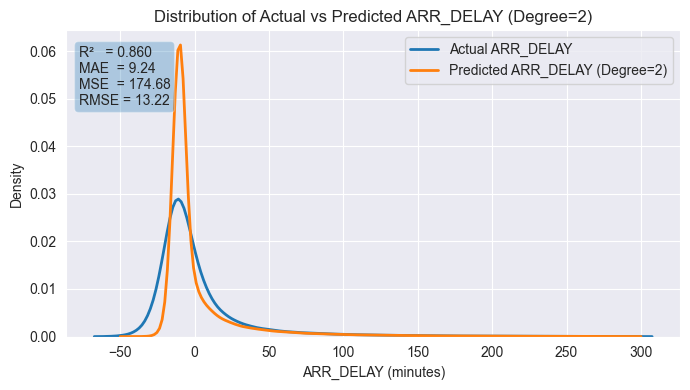

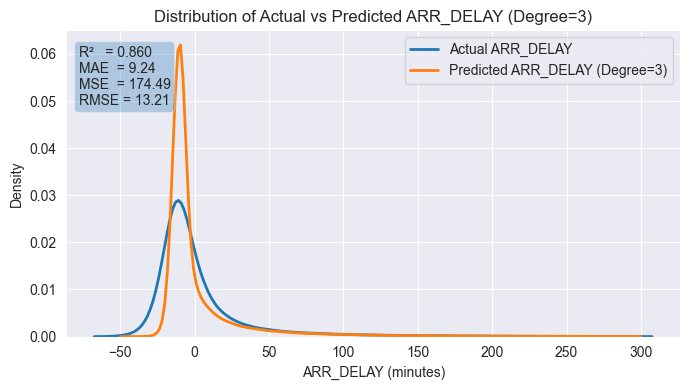

In [71]:
from sklearn.preprocessing import PolynomialFeatures

for degree in [1, 2, 3]:
    # ===== Pipeline số =====
    if degree == 1:
        num_pipeline = Pipeline([
            ("scaler", StandardScaler())
        ])
    else:
        num_pipeline = Pipeline([
            ("scaler", StandardScaler()),
            ("poly", PolynomialFeatures(degree=degree, include_bias=False))
        ])

    preprocess = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", num_pipeline, num_features),
    ])

    model = Pipeline([
        ("preprocess", preprocess),
        ("lr", LinearRegression())
    ])

    # ===== Train & Predict =====
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # ===== Metrics =====
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # ===== Plot =====
    plt.figure(figsize=(7, 4))

    sns.kdeplot(y_test, label="Actual ARR_DELAY", linewidth=2)
    sns.kdeplot(
        y_pred,
        label=f"Predicted ARR_DELAY (Degree={degree})",
        linewidth=2,
        clip=(-50, 300)   # tránh nổ KDE
    )

    plt.xlabel("ARR_DELAY (minutes)")
    plt.ylabel("Density")
    plt.title(f"Distribution of Actual vs Predicted ARR_DELAY (Degree={degree})")
    plt.legend()

    # ===== Hiển thị metrics trên biểu đồ =====
    metrics_text = (
        f"R²   = {r2:.3f}\n"
        f"MAE  = {mae:.2f}\n"
        f"MSE  = {mse:.2f}\n"
        f"RMSE = {rmse:.2f}"
    )

    plt.text(
        0.02, 0.95,
        metrics_text,
        transform=plt.gca().transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=dict(boxstyle="round", alpha=0.3)
    )

    plt.tight_layout()
    plt.show()


Kết quả thử nghiệm với hồi quy đa thức cho thấy việc tăng bậc từ 1 lên 2 hoặc 3 không cải thiện các chỉ số MAE, RMSE và R² trên tập kiểm tra. Điều này cho thấy mối quan hệ giữa các biến đầu vào và độ trễ khi hạ cánh là gần tuyến tính. Do đó, mô hình hồi quy tuyến tính đa biến được lựa chọn cho bài toán

Mở rộng: mô hình tuyến tính linh hoạt

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_and_predict(input_data: dict, df: pd.DataFrame, target="ARR_DELAY"):
    """
    input_data: dict chứa biến đầu vào (ít nhất 1 biến numeric)
    df: DataFrame đầy đủ dữ liệu để train

    Hàm tự động phân loại biến categorical, numeric dựa vào kiểu dữ liệu trong df,
    chọn những biến có trong input_data,
    train lại mô hình trên train set với biến đó,
    rồi dự đoán trên input_data.
    """
    # Tách biến categorical và numeric dựa trên df gốc
    categorical_vars = df.select_dtypes(include=["object", "category"]).columns.tolist()
    numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()

    # Lọc biến input có trong df
    input_vars = list(input_data.keys())

    # Biến categorical có trong input
    cat_features = [v for v in input_vars if v in categorical_vars]
    # Biến numeric có trong input
    num_features = [v for v in input_vars if v in numeric_vars]

    if len(num_features) == 0:
        raise ValueError("Phải có ít nhất 1 biến numeric trong input_data")

    # Chuẩn bị dữ liệu cho train/test với biến đã chọn
    X = df[cat_features + num_features]
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    preprocess = ColumnTransformer(
        transformers=[
            ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features) if cat_features else ("passthrough", "passthrough", []),
            ("num", StandardScaler(), num_features) if num_features else ("passthrough", "passthrough", [])
        ]
    )

    pipeline = Pipeline(
        steps=[
            ("preprocess", preprocess),
            ("model", LinearRegression())
        ]
    )

    # Train mô hình với biến được chọn
    pipeline.fit(X_train, y_train)

    # Tạo DataFrame input để dự đoán
    df_input = pd.DataFrame([input_data])

    # Dự đoán
    pred = pipeline.predict(df_input)

    # Có thể in luôn kết quả đánh giá trên test set (tuỳ bạn)
    y_pred_test = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred_test)
    r2 = r2_score(y_test, y_pred_test)

    print(f"Biến categorical dùng: {cat_features}")
    print(f"Biến numeric dùng: {num_features}")
    print(f"Đánh giá mô hình trên test set: MSE={mse:.3f}, RMSE={rmse:.3f}, MAE={mae:.3f}, R2={r2:.3f}")

    return pred[0]


In [73]:
input_example = {
    "AIRLINE": "AA",
    "DEP_DELAY": 10,
    "MONTH": 5
}

result = train_and_predict(input_example, df)
print(f"Dự đoán thời gian trễ: {result:.2f} phút")

Biến categorical dùng: ['AIRLINE']
Biến numeric dùng: ['DEP_DELAY', 'MONTH']
Đánh giá mô hình trên test set: MSE=177.223, RMSE=13.313, MAE=9.308, R2=0.858
Dự đoán thời gian trễ: 5.42 phút


In [171]:
input_example_2 = {
    "DEP_DELAY": 10
}

result_2 = train_and_predict(input_example_2, df)
print(f"Dự đoán thời gian trễ (Input 2): {result_2:.2f} phút")

Biến categorical dùng: []
Biến numeric dùng: ['DEP_DELAY']
Đánh giá mô hình trên test set: MSE=179.561, RMSE=13.400, MAE=9.407, R2=0.856
Dự đoán thời gian trễ (Input 2): 4.22 phút


In [172]:
input_example_3 = {
    "AIRLINE": "DL",
    "DEP_DELAY": 15,
    "MONTH": 12
}

result_3 = train_and_predict(input_example_3, df)
print(f"Dự đoán thời gian trễ (Input 3): {result_3:.2f} phút")

Biến categorical dùng: ['AIRLINE']
Biến numeric dùng: ['DEP_DELAY', 'MONTH']
Đánh giá mô hình trên test set: MSE=177.223, RMSE=13.313, MAE=9.308, R2=0.858
Dự đoán thời gian trễ (Input 3): 10.73 phút


In [173]:
input_example_4 = {
    "AIRLINE": "AA",
    "DEST": "LAX",
    "MONTH": 7,
    "WEEKDAY": 3,
    "dep_hour": 14,
}

result_4 = train_and_predict(input_example_4, df)
print(f"Dự đoán thời gian trễ (Input 4): {result_4:.2f} phút")

Biến categorical dùng: ['AIRLINE', 'DEST']
Biến numeric dùng: ['MONTH', 'WEEKDAY', 'dep_hour']
Đánh giá mô hình trên test set: MSE=1222.297, RMSE=34.961, MAE=21.015, R2=0.022
Dự đoán thời gian trễ (Input 4): 1.94 phút


Mô hình Random Forest

In [74]:
from sklearn.ensemble import RandomForestRegressor
# ===== Feature setup (giữ nguyên) =====
cat_features = ["AIRLINE", "ORIGIN", "DEST"]
num_features = ["MONTH", "WEEKDAY", "dep_hour", "DEP_DELAY"]

df_small = df.sample(n=100_000, random_state=42)

X = df_small[cat_features + num_features]
y = df_small["ARR_DELAY"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== Preprocess (giữ nguyên) =====
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", StandardScaler(), num_features),
    ]
)

# ===== Random Forest pipeline =====
pipeline_rf = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", RandomForestRegressor(
            n_estimators=300,
            max_depth=None,
            min_samples_split=10,
            min_samples_leaf=5,
            random_state=42,
            n_jobs=-1
        ))
    ]
)

# ===== Train =====
pipeline_rf.fit(X_train, y_train)

# ===== Predict =====
y_pred = pipeline_rf.predict(X_test)

# ===== Evaluate =====
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Random Forest Results")
print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2  : {r2:.3f}")

Random Forest Results
MAE : 9.38
RMSE: 13.15
R2  : 0.863


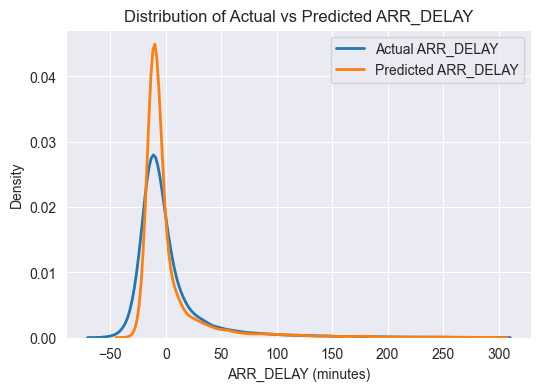

In [75]:
plt.figure(figsize=(6, 4))

sns.kdeplot(y, label="Actual ARR_DELAY", linewidth=2)
sns.kdeplot(y_pred, label="Predicted ARR_DELAY", linewidth=2)

plt.xlabel("ARR_DELAY (minutes)")
plt.ylabel("Density")
plt.title("Distribution of Actual vs Predicted ARR_DELAY")
plt.legend()

plt.show()

Mô hình XGBoost

In [77]:

import xgboost as xgb

from sklearn.compose import ColumnTransformer

cat_features = ["AIRLINE", "ORIGIN", "DEST"]
num_features = ["MONTH", "WEEKDAY", "dep_hour", "DEP_DELAY"]

X = df[cat_features + num_features]
y = df["ARR_DELAY"]

# ----------------
# TRAIN / TEST
# ----------------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

# ----------------
# PREPROCESS
# ----------------
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=True), cat_features),
        ("num", "passthrough", num_features),
    ]
)

# ----------------
# XGBOOST MODEL
# ----------------
xgb_model = xgb.XGBRegressor(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    tree_method="hist",          # BẮT BUỘC cho dữ liệu lớn
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

# ----------------
# PIPELINE
# ----------------
pipeline_xgb = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("model", xgb_model)
    ]
)

# ----------------
# TRAIN
# ----------------
pipeline_xgb.fit(X_train, y_train)

# ----------------
# EVALUATION
# ----------------
y_pred = pipeline_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE : {mae:.2f}")
print(f"MSE : {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2  : {r2:.3f}")


MAE : 9.26
MSE : 175.40
RMSE: 13.24
R2  : 0.860


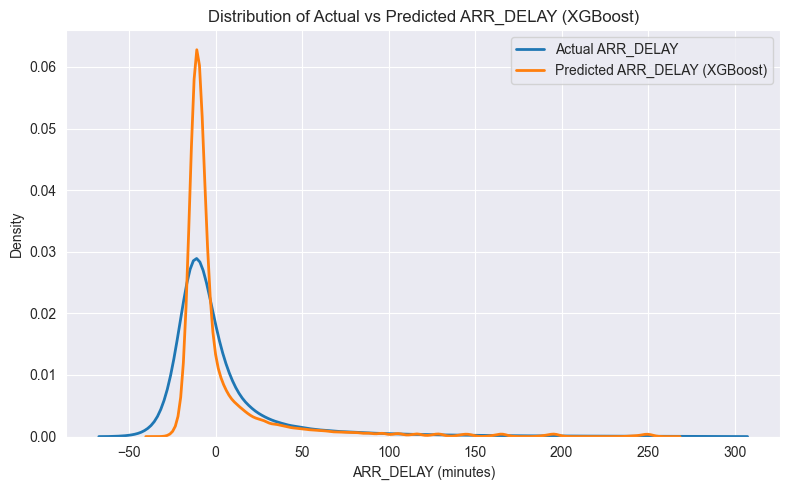

In [78]:

plt.figure(figsize=(8, 5))

sns.kdeplot(
    y_test,
    label="Actual ARR_DELAY",
    linewidth=2
)

sns.kdeplot(
    y_pred,
    label="Predicted ARR_DELAY (XGBoost)",
    linewidth=2
)

plt.xlabel("ARR_DELAY (minutes)")
plt.ylabel("Density")
plt.title("Distribution of Actual vs Predicted ARR_DELAY (XGBoost)")
plt.legend()
plt.tight_layout()
plt.show()